[*********************100%%**********************]  1 of 1 completed


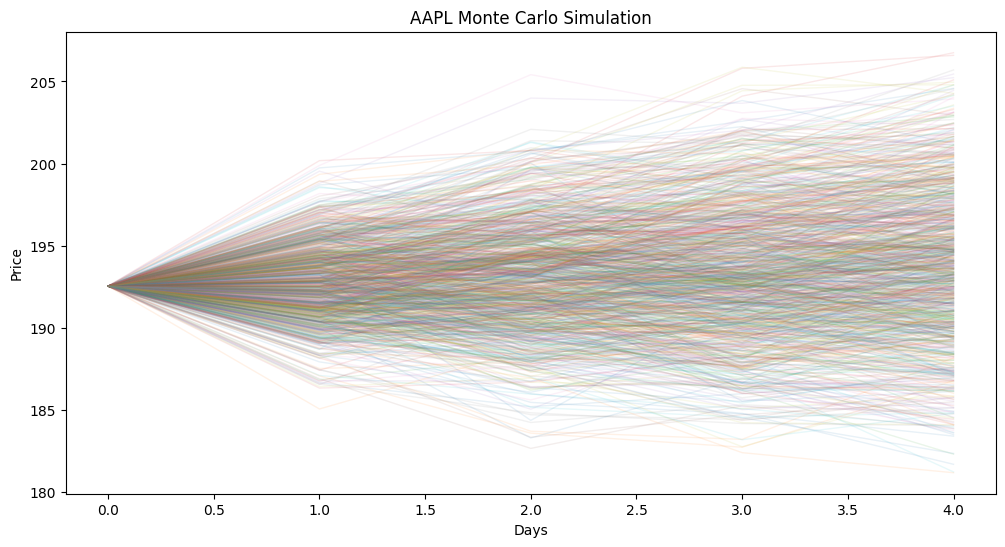

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Collect historical data
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-01-01'
data = yf.download(ticker, start=start_date, end=end_date)
prices = data['Close']

# Step 2: Calculate log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

# Step 3: Estimate parameters
mean_return = log_returns.mean()
volatility = log_returns.std()

# Monte Carlo simulation parameters
num_simulations = 1000
num_days = 5  # Number of trading days in a year

# Step 4: Simulate future prices
def monte_carlo_simulation(start_price, mean_return, volatility, num_days, num_simulations):
    simulated_prices = np.zeros((num_days, num_simulations))
    simulated_prices[0] = start_price

    for t in range(1, num_days):
        random_shocks = np.random.normal(loc=mean_return, scale=volatility, size=num_simulations)
        simulated_prices[t] = simulated_prices[t - 1] * np.exp(random_shocks)
    
    return simulated_prices

start_price = prices.iloc[-1]
simulated_prices = monte_carlo_simulation(start_price, mean_return, volatility, num_days, num_simulations)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices, lw=1, alpha=0.1)
plt.title(f'{ticker} Monte Carlo Simulation')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


In [2]:
simulated_prices.max(), simulated_prices.min()

(206.750536723884, 181.16293143418864)

Use sentiment score gamma to calculate new stock price

  $$ S_T=   \left\{
\begin{array}{ll}
      S_0+[(S_{MC}^+ -S_0) \cdot \gamma] & \text{ if }  \gamma \text{ in } (0, 1] \\
      S_0-[(S_0 - S_{MC}^-) \cdot  \gamma] & \text{ if } \gamma \text{ in } [-1, 0) \\
\end{array} 
\right.  $$

In [3]:
gamma = 0.27

def NewStockPrice(gamma, S, S0):
    if gamma <0:
        S_T= S0 - (S0 - S.min())*gamma
    else:
        S_T= S0 + (S.max() - S0)*gamma
    return S_T

ST = NewStockPrice(gamma, simulated_prices, start_price)
ST

196.3695440243354

Calculate Yield

 $$ Yield = \frac{S_T-S0}{S_T} \times 100$$

In [7]:
def Yield(S, S0):
    y = (S-S0)/S*100
    return y

Y = Yield(ST, start_price)
Y

1.9552651426245102